In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from datetime import datetime

In [2]:
DATA_PATH = r'/scratch/gallowaa/cciw/Data'

In [3]:
# Search for all video files on Google Drive...
all_images = glob(os.path.join(DATA_PATH,'Videos_and_stills/GLNI/*/*/*/Images/Quad*/*.jpg'))
#all_images = glob(os.path.join(DATA_PATH,'Videos_and_stills/GLNI/*/*/May.*/Stills/Quad*/*.jpg'))

In [4]:
imagetable_path = os.path.join(DATA_PATH, 'Tables', 'ImageTable.csv')
image_df = pd.read_csv(imagetable_path, index_col=0)

In [5]:
analysis_path = os.path.join(DATA_PATH, 'Tables', 'Analysis.csv')
dive_path = os.path.join(DATA_PATH, 'Tables', 'Dives.csv')

analysis_df = pd.read_csv(analysis_path, index_col=0, dtype={'Count':float})
dive_df = pd.read_csv(dive_path, index_col=0, parse_dates=['Date'])
data_df = pd.merge(analysis_df, dive_df, on='Dive Index', how='outer')
data_df.columns

Index(['Dive Index', 'Quadrat', 'Live Coverage', 'Empty Coverage', 'Biomass',
       'Count', '16mm', '14mm', '12.5mm', '10mm', '8mm', '6.3mm', '4mm', '2mm',
       'Analysis Index', 'Cruise #', 'CSN', 'PSN', 'Date', 'Depth (m)',
       'Overall Coverage', 'Silt (%)', 'Clay (%)', 'Sand (%)', 'Gravel (%)',
       'Cobble (%)', 'Rock (%)', 'Bedrock (%)', 'Boulders (%)', 'Shale (%)',
       'Underlying Substrate Type', 'Underlying Substrate Depth (cm)'],
      dtype='object')

In [6]:
# Number of dives for each year-month
dive_df['Year-Month'] = dive_df['Date'].dt.strftime('%Y-%m')
dive_df_by_year_month = dive_df.groupby(by='Year-Month').count()['PSN']
dive_df_by_year_month.index = [datetime.strptime(year_month, '%Y-%m') for year_month in dive_df_by_year_month.index]
#dive_df_by_year_month

In [81]:
YM = '2016-07'

save_path = os.path.join('/scratch/ssd/gallowaa/cciw/dataset_raw/Train', YM + '/port/')
print(save_path)

dive_idx = dive_df[dive_df['Year-Month'].values == YM].index #['Dive Index']
print(dive_idx)

/scratch/ssd/gallowaa/cciw/dataset_raw/Train/2016-07/port/
Int64Index([418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
            431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443],
           dtype='int64', name='Dive Index')


In [82]:
relevant_dives_df = data_df.loc[data_df['Dive Index'].isin(dive_idx)]

In [83]:
# analysis indices for data collected in 2018-07
indices = relevant_dives_df['Analysis Index'].values

In [84]:
relevant_images_df = image_df[image_df['Analysis Index'].isin(indices)]
fnames = relevant_images_df['Name']
#fnames

In [85]:
root = os.path.join(DATA_PATH,'Videos_and_stills/GLNI/')

In [87]:
# only load the highest number
fnames = fnames.to_list()
fnames.sort()
print(len(fnames))

AttributeError: 'list' object has no attribute 'to_list'

In [92]:
# only keep the images with highest suffix number (highest quality)
# run twice
for i, f in enumerate(fnames):
    t = f.split('.')[0].split('_')
    img_nb = int(t[-1].split('-')[1])
    # check the image number
    if img_nb > 1:
        # sometimes numbers are non-contiguous
        while (img_nb - 1) > 0:
            try:
                to_rm = t[0] + '_' + t[1] + '_' + t[2] + '_' + t[3].split('-')[0] + '-' + str(img_nb - 1) + '.nef'
                #print(to_rm)
                fnames.remove(to_rm)
            except:
                pass
            img_nb -= 1
print(len(fnames))

55


In [15]:
#fnames[0].split('/')

In [93]:
if YM.split('-')[1] == '08':
    month = 'Aug.'
elif YM.split('-')[1] == '07':
    month = 'Jul.'
elif YM.split('-')[1] == '06':
    month = 'Jun.'
else:
    print('invalid')
print('got month ', month)

got month  Jul.


In [94]:
#from tqdm import tqdm_notebook

In [96]:
dim = []
for i, f in enumerate(fnames):
    t = f.split('.')[0].split('_')
    #print(tokens)
    PSN = t[1].split('-')[0]
    QUAD = t[1].split('-')[1]
    file = root + PSN + '/2016/' + month + t[2].split('-')[-1] + '/Images/Quad' + QUAD + '/' + f.split('.')[0] + '.jpg'
    im = cv.imread(file)
    #rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    #plt.imshow(im[::4, ::4, :])
    #plt.title('frame ' + str(i))
    #plt.pause(0.1)
    dim.append((i, im.shape[0]))
dim = np.asarray(dim)

In [97]:
vals, cts = np.unique(dim[:, 1], return_counts=True)
print(vals)
print(cts)
print(cts.sum())

port_mode = dim[:, 0][dim[:, 1] == 7378]
land_mode = dim[:, 0][dim[:, 1] == 4924]

[3788 4924 6738 7378]
[ 1 28  2 24]
55


In [98]:
print(len(land_mode))

28


In [99]:
portrait = np.asarray(fnames)[port_mode].tolist()
portrait

['GLNI_12-2_2016-07-11_image-8.nef',
 'GLNI_12-3_2016-07-11_image-5.nef',
 'GLNI_1274-3_2016-07-20_image-4.nef',
 'GLNI_1340-3_2016-07-20_image-4.nef',
 'GLNI_1341-3_2016-07-07_image-4.nef',
 'GLNI_1341-3_2016-07-20_image-4.nef',
 'GLNI_1342-1_2016-07-07_image-5.nef',
 'GLNI_1342-3_2016-07-07_image-5.nef',
 'GLNI_1343-1_2016-07-07_image-3.nef',
 'GLNI_1344-1_2016-07-07_image-6.nef',
 'GLNI_1344-2_2016-07-07_image-4.nef',
 'GLNI_1349-1_2016-07-06_image-2.nef',
 'GLNI_1349-2_2016-07-06_image-2.nef',
 'GLNI_1351-3_2016-07-06_image-8.nef',
 'GLNI_1352-1_2016-07-06_image-5.nef',
 'GLNI_1352-2_2016-07-06_image-4.nef',
 'GLNI_1353-1_2016-07-12_image-2.nef',
 'GLNI_1353-2_2016-07-12_image-9.nef',
 'GLNI_1353-3_2016-07-12_image-5.nef',
 'GLNI_1354-2_2016-07-12_image-5.nef',
 'GLNI_1354-3_2016-07-12_image-3.nef',
 'GLNI_1355-1_2016-07-12_image-5.nef',
 'GLNI_1356-2_2016-07-12_image-6.nef',
 'GLNI_1356-3_2016-07-12_image-6.nef']

In [145]:
landscape = np.asarray(fnames)[land_mode].tolist()
print(len(landscape))
landscape

28


['GLNI_1274-1_2016-07-20_image-4.nef',
 'GLNI_1274-2_2016-07-20_image-4.nef',
 'GLNI_1340-1_2016-07-20_image-6.nef',
 'GLNI_1340-2_2016-07-20_image-4.nef',
 'GLNI_1341-1_2016-07-07_image-3.nef',
 'GLNI_1341-1_2016-07-20_image-5.nef',
 'GLNI_1341-2_2016-07-07_image-3.nef',
 'GLNI_1341-2_2016-07-20_image-4.nef',
 'GLNI_1342-2_2016-07-07_image-5.nef',
 'GLNI_1343-1_2016-07-20_image-2.nef',
 'GLNI_1343-2_2016-07-07_image-3.nef',
 'GLNI_1343-2_2016-07-20_image-2.nef',
 'GLNI_1343-3_2016-07-07_image-3.nef',
 'GLNI_1343-3_2016-07-20_image-2.nef',
 'GLNI_1344-3_2016-07-07_image-5.nef',
 'GLNI_1349-3_2016-07-06_image-2.nef',
 'GLNI_1350-1_2016-07-06_image-4.nef',
 'GLNI_1350-2_2016-07-06_image-3.nef',
 'GLNI_1350-3_2016-07-06_image-4.nef',
 'GLNI_1351-1_2016-07-06_image-5.nef',
 'GLNI_1351-2_2016-07-06_image-6.nef',
 'GLNI_1352-3_2016-07-06_image-8.nef',
 'GLNI_1355-2_2016-07-12_image-5.nef',
 'GLNI_1355-3_2016-07-12_image-3.nef',
 'GLNI_1356-1_2016-07-12_image-3.nef',
 'GLNI_456-1_2016-07-20_i

In [186]:
i = 28
f = landscape[i]

img_idx = relevant_images_df.loc[relevant_images_df['Name'] == f]['Analysis Index']
biomass = relevant_dives_df.loc[img_idx]['Biomass'].values
count = relevant_dives_df.loc[img_idx]['Count'].values
live_cv = relevant_dives_df.loc[img_idx]['Live Coverage'].values

t = f.split('.')[0].split('_')
PSN, QUAD = t[1].split('-')[0], t[1].split('-')[1]
file = root + PSN + '/2016/' + month + t[2].split('-')[-1] + '/Images/Quad' + QUAD + '/' + f.split('.')[0] + '.jpg'
im = cv.imread(file)
rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14, 12))
plt.imshow(rgb)

#title_str = portrait[i] + ',  Biomass %.1f, Count %d, Live Coverage %.1f%%' % (biomass, count, live_cv)
#plt.title(title_str)
plt.show()

IndexError: list index out of range

In [171]:
landscape[i]

'GLNI_1350-1_2016-07-06_image-4.nef'

3000
3000


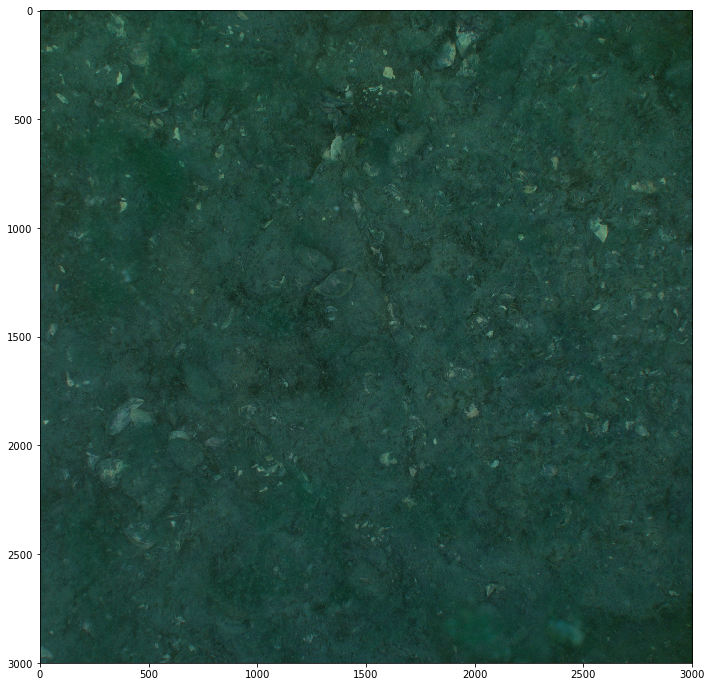

In [180]:
# for portrait mode (7378, 4924)
#x_start = 2250 #1450
#x_end = x_start + 3000

# for landscape mode (4924, 7378)
y_start = 1000
x_start = 2200
y_end = y_start + 3000
x_end = x_start + 3000
print(x_end - x_start)
print(y_end - y_start)
imc = im[y_start:y_end, x_start:x_end, :]
plt.figure(figsize=(12, 12))
plt.imshow(imc)

In [181]:
width = int(imc.shape[0] * scale_percent / 100)
height = int(imc.shape[1] * scale_percent / 100)
imcr = cv.resize(imc, (width, height)) # resize image
cv.imwrite(os.path.join(save_path, f.split('.')[0] + '_crop.jpg'), imcr)

True

In [30]:
scale_percent = 75 # percent of original size

In [ ]:
"""
# for landscape mode (4924, 7378)
x_start, x_end = 2100, 5100
#x_start, x_end = 2200, 5200
#y_start, y_end = 800, 3800
y_start, y_end = 1000, 4000
"""

In [ ]:
#%matplotlib inline
#i = 2
#root_fname = fnames.values[portrait_mode][i].split('/')[-1].split('.')[0]
#guid = image_df[image_df['Name'].str.contains(root_fname)]['Analysis Index'].astype('int64')
#data_df[data_df['Analysis Index'].values == guid.values]

guid = image_df[image_df['Name'].str.contains('3801-1_2018-08')]['Analysis Index'].astype('int64')
data_df[data_df['Analysis Index'].values == np.unique(guid.values)]